In [170]:
import pandas as pd 
df = pd.read_csv('/Users/isaiahhollars/Desktop/butterfly data anal/clumping_data.csv')
df.head()


,q,clump-patch,clump-radius
0,0.0,496,2.732
1,0.0,494,2.804
2,0.0,487,2.760
3,0.0,496,2.732
4,0.0,495,2.852


In [171]:
#min max normalize 
df['clump-patch-norm'] =  (df['clump-patch'] - df['clump-patch'].min()) / (df['clump-patch'].max() - df['clump-patch'].min())
df['clump-rad-norm'] =  (df['clump-radius'] - df['clump-radius'].min()) / (df['clump-radius'].max() - df['clump-radius'].min())
df.head(1)

,q,clump-patch,clump-radius,clump-patch-norm,clump-rad-norm
0,0.0,496,2.732,0.991979,0.003253


In [172]:
# invert the patch norm score becuase a lower value is better 
df['clump-patch-norm-invert'] =  (1-df['clump-patch-norm'])
df.head()

,q,clump-patch,clump-radius,clump-patch-norm,clump-rad-norm,clump-patch-norm-invert
0,0.0,496,2.732,0.991979,0.003253,0.008021
1,0.0,494,2.804,0.986631,0.005595,0.013369
2,0.0,487,2.760,0.967914,0.004163,0.032086
3,0.0,496,2.732,0.991979,0.003253,0.008021
4,0.0,495,2.852,0.989305,0.007156,0.010695


In [173]:
# create new metric that averages our normed features
df['score_minmax'] = (df['clump-rad-norm']+df['clump-patch-norm-invert'])/2
df.tail(1)

,q,clump-patch,clump-radius,clump-patch-norm,clump-rad-norm,clump-patch-norm-invert,score_minmax
504,1.0,201,6.5,0.203209,0.125813,0.796791,0.461302


In [174]:
import numpy as np
import matplotlib.pyplot as plt

In [175]:
df = df.rename({'q ': 'q'}, axis=1)  # new method

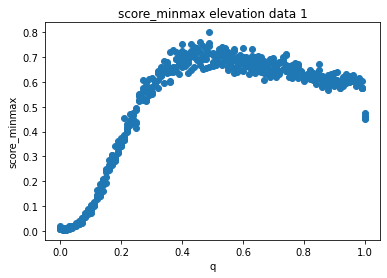

In [176]:
xs = df['q']
ys = df['score_minmax']
plt.scatter(xs, ys)
plt.title('score_minmax elevation data 1')
plt.xlabel('q')
plt.ylabel('score_minmax')
plt.show()

In [177]:
#fit 5th degree polynom
xs = df['q']
ys = df['score_minmax']
poly_fit = np.poly1d(np.polyfit(xs,ys, 5))
print(poly_fit)


        5         4         3      2
-24.84 x + 66.15 x - 61.34 x + 21 x - 0.447 x - 8.475e-05


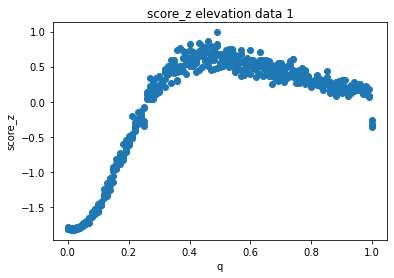

In [178]:
# z-score normalize:
df['z-patch'] = (df['clump-patch'] - df['clump-patch'].mean()) / df['clump-patch'].std()
df['z-patch-invert'] = -1*df['z-patch']
df['z-rad'] = (df['clump-radius'] - df['clump-radius'].mean()) / df['clump-radius'].std()
df['score_z'] = (df['z-rad'] + df['z-patch-invert'])/2

xs = df['q']
ys = df['score_z']
plt.scatter(xs, ys)
plt.title('score_z elevation data 1')
plt.xlabel('q')
plt.ylabel('score_z')
plt.show()

In [179]:
#fit 5th degree polynom
xs = df['q']
ys = df['score_z']
poly_fit = np.poly1d(np.polyfit(xs,ys, 5))
print(poly_fit)

        5         4         3         2
-89.43 x + 238.1 x - 220.5 x + 75.06 x - 1.525 x - 1.844


### now we will do the same analysis for the other elevation dataset 

In [180]:
df2 = pd.read_csv('/Users/isaiahhollars/Desktop/butterfly data anal/rectangle.csv')
df2 = df2.rename({'q': 'q2', 'clumping-patch':'clump-patch2','clumping-radius': 'clump-radius2'}, axis=1)  # new method
df2.head(1)

,q2,clump-patch2,clump-radius2
0,0.0,498,2.096


In [181]:
#minmax
df2['clump-patch-norm2'] =  (df2['clump-patch2'] - df2['clump-patch2'].min()) / (df2['clump-patch2'].max() - df2['clump-patch2'].min())
df2['clump-rad-norm2'] =  (df2['clump-radius2'] - df2['clump-radius2'].min()) / (df2['clump-radius2'].max() - df2['clump-radius2'].min())
# invert the patch norm score becuase a lower value is better 
df2['clump-patch-norm-invert2'] =  (1-df2['clump-patch-norm2'])
df2['score_minmax2'] = (df2['clump-rad-norm2']+df2['clump-patch-norm-invert2'])/2


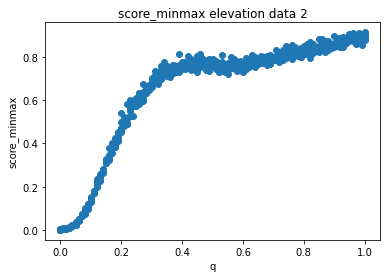

In [182]:
xs = df2['q2']
ys = df2['score_minmax2']
plt.scatter(xs, ys)
plt.title('score_minmax elevation data 2')
plt.xlabel('q')
plt.ylabel('score_minmax')
plt.show()

In [183]:
#fit 5th degree polynom
xs = df2['q2']
ys = df2['score_minmax2']
poly_fit = np.poly1d(np.polyfit(xs,ys, 5))
print(poly_fit)


       5         4        3        2
-23.1 x + 58.54 x - 49.7 x + 13.9 x + 1.259 x - 0.044


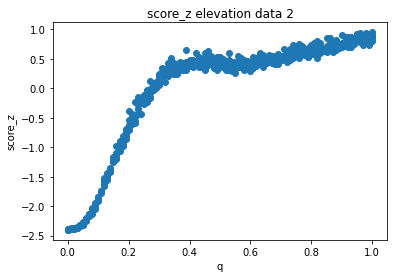

In [184]:
# z-score normalize:
df2['z-patch2'] = (df2['clump-patch2'] - df2['clump-patch2'].mean()) / df2['clump-patch2'].std()
df2['z-patch-invert2'] = -1*df2['z-patch2']
df2['z-rad2'] = (df2['clump-radius2'] - df2['clump-radius2'].mean()) / df2['clump-radius2'].std()
df2['score_z2'] = (df2['z-rad2'] + df2['z-patch-invert2'])/2

xs = df2['q2']
ys = df2['score_z2']
plt.scatter(xs, ys)
plt.title('score_z elevation data 2')
plt.xlabel('q')
plt.ylabel('score_z')
plt.show()

In [185]:
#fit 5th degree polynom
xs = df2['q2']
ys = df2['score_minmax2']
poly_fit = np.poly1d(np.polyfit(xs,ys, 5))
print(poly_fit)


       5         4        3        2
-23.1 x + 58.54 x - 49.7 x + 13.9 x + 1.259 x - 0.044


### problem town us... 
in the new world, it seems that butterflies do best when q=1 but this seems really lame... 

## Take both datasets into account!

In [188]:
bigdf = pd.concat([df,df2], axis=1)
bigdf.drop(['q2'], axis=1, inplace=True)
bigdf.columns

Index(['q', 'clump-patch', 'clump-radius', 'clump-patch-norm',
       'clump-rad-norm', 'clump-patch-norm-invert', 'score_minmax', 'z-patch',
       'z-patch-invert', 'z-rad', 'score_z', 'clump-patch2', 'clump-radius2',
       'clump-patch-norm2', 'clump-rad-norm2', 'clump-patch-norm-invert2',
       'score_minmax2', 'z-patch2', 'z-patch-invert2', 'z-rad2', 'score_z2'],
      dtype='object')

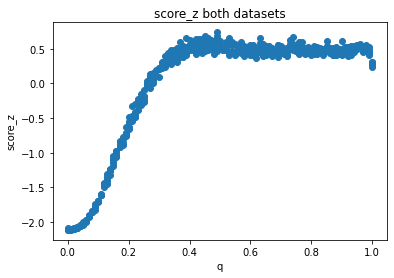

In [190]:
bigdf['big_score_z'] = (bigdf['score_z'] + bigdf['score_z2'])/2
bigdf['big_score_minmax'] = (bigdf['score_minmax'] + bigdf['score_minmax2'])/2


xs = bigdf['q']
ys = bigdf['big_score_z']
plt.scatter(xs, ys)
plt.title('score_z both datasets')
plt.xlabel('q')
plt.ylabel('score_z')
plt.show()

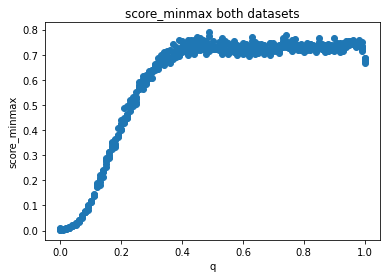

In [191]:
xs = bigdf['q']
ys = bigdf['big_score_minmax']
plt.scatter(xs, ys)
plt.title('score_minmax both datasets')
plt.xlabel('q')
plt.ylabel('score_minmax')
plt.show()

In [192]:
#fit 5th degree polynom
xs = bigdf['q']
ys = bigdf['big_score_minmax']
poly_fit = np.poly1d(np.polyfit(xs,ys, 5))
print(poly_fit)

        5         4         3         2
-23.97 x + 62.34 x - 55.52 x + 17.45 x + 0.4062 x - 0.02204
